In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [25]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [26]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [27]:
numeric = ['avg_training_score', 'age', 'length_of_service', 'no_of_trainings']
category = ['KPIs_met >80%', 'awards_won?' ,'previous_year_rating', 'department', 'region', 'education', 'gender', 'recruitment_channel']

In [28]:
for i in category:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')

train_data['is_promoted'] = train_data['is_promoted'].astype('category')

In [29]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [30]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [31]:
# Filling Null values
train_data['education'] = train_data['education'].cat.add_categories('No Degree')
train_data['education'].fillna('No Degree',inplace = True)
test_data['education'] = test_data['education'].cat.add_categories('No Degree')
test_data['education'].fillna('No Degree',inplace = True)

In [32]:
# Filling Null values
train_data['previous_year_rating'] = train_data['previous_year_rating'].cat.add_categories('No Rating')
train_data['previous_year_rating'].fillna('No Rating',inplace = True)
test_data['previous_year_rating'] = test_data['previous_year_rating'].cat.add_categories('No Rating')
test_data['previous_year_rating'].fillna('No Rating',inplace = True)

In [33]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [35]:
#normalising values in to range 0-1
for i in numeric:
    train_data[i] = preprocessing.normalize(train_data[i].values.reshape(-1,1))
    test_data[i] = preprocessing.normalize(test_data[i].values.reshape(-1,1))

In [36]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,1.0,5,1.0,1,0,1.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,1.0,5,1.0,0,0,1.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,1.0,3,1.0,0,0,1.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,1.0,1.0,1,1.0,0,0,1.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,1.0,3,1.0,0,0,1.0,0


In [37]:
#OneHotEncoding
for i in category:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[i], prefix=i)], axis=1)
    train_data.drop(i, axis=1, inplace=True)
    test_data = pd.concat([test_data, pd.get_dummies(test_data[i], prefix=i)], axis=1)
    test_data.drop(i, axis=1, inplace=True)


In [38]:
#droping employee_id
train_data.drop('employee_id', axis=1, inplace=True)
Emp_ID = test_data['employee_id']
test_data.drop('employee_id', axis=1, inplace=True)

In [39]:
train_data.head()

,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1,previous_year_rating_1.0,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_No Degree,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,1.0,1.0,1.0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1.0,1.0,1.0,1.0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.0,1.0,1.0,1.0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1.0,1.0,1.0,1.0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
4,1.0,1.0,1.0,1.0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0


In [40]:
test_data.head()

,no_of_trainings,age,length_of_service,avg_training_score,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1,previous_year_rating_1.0,previous_year_rating_2.0,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_No Degree,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,1.0,1.0,1.0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1.0,1.0,1.0,1.0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1.0,1.0,1.0,1.0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,1.0,1.0,1.0,1.0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,1.0,1.0,1.0,1.0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [41]:
# train test split
X = train_data.drop("is_promoted",axis=1)
Y = train_data["is_promoted"]
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = Y)

In [42]:
def NB_tune(X_tr,y_tr):
    
    alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = MultinomialNB()
    # hyper parameters to be used for grid search
    parameters = dict(alpha=alpha)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score=True)
    
    grid_clf.fit(X_tr,y_tr)
    
    
    train_accuracy = grid_clf.cv_results_['mean_train_score']
    cv_accuracy = grid_clf.cv_results_['mean_test_score']
    optimal_alpha = grid_clf.best_params_['alpha'] 
    
    return train_accuracy,cv_accuracy,optimal_alpha
    

In [43]:
def plot_hyperparam_vs_f1score(param,cv_accuracy,train_accuracy):
    plt.title('NB Varying hyper params')
    plt.plot(param, cv_accuracy, label='Validation F1')
    plt.plot(param, train_accuracy, label='Train F1')
    plt.legend()
    plt.xlabel('Hyper Parameter')
    plt.ylabel('F1 Score')
    plt.show()

In [44]:
train_acc,cv_acc, opt_alpha = NB_tune(X,Y)

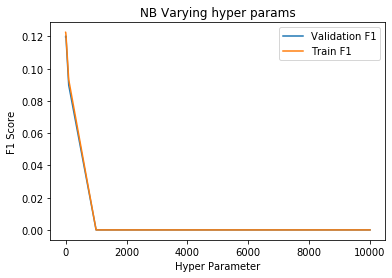

In [45]:
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

plot_hyperparam_vs_f1score(alpha,cv_acc,train_acc)

In [46]:
#getting the optimal 
f1_NB = max(cv_acc)
print(opt_alpha,f1_NB)

1 0.12032081176231141


In [24]:
#retrain on full data
clf = MultinomialNB(alpha = opt_alpha)
    
#Fit the model
clf.fit(X,Y)
    
#Compute accuracy on the training set
pred = clf.predict(test_data)

In [25]:
d = {'employee_id': Emp_ID, 'is_promoted': pred}
upload_NB = pd.DataFrame(d)
upload_NB.to_csv("upload_NB.csv",index=False)